<a href="https://colab.research.google.com/github/byambaa1982/covid-19/blob/master/covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/fiverr"
base_dir = root_dir + 'byamba-v3/'

Mounted at /content/gdrive


In [122]:
import os
os.chdir('/content/gdrive/My Drive/fiverr/frank')  #change dir
# !mkdir train  #create a directory named train/
# !mkdir test  #create a directory named test/
#!unzip -q varm.zip   #unzip data in StevenCSV

In [123]:
import pandas as pd
import numpy as np
import json
import regex as re
import matplotlib
import matplotlib.pyplot as plt

In [183]:
def query_it(countries,states,counties,start_date,end_date,fact):
  df=pd.read_csv('/content/gdrive/My Drive/fiverr/frank/Covid-19 - RawData.csv')
  new_header = df.iloc[0] #grab the first row for the header
  df = df[1:] #take the data less the header row
  df.columns = new_header #set the header row as the df header
  df=df[['DIMENSION1','DIMENSION2','DIMENSION3','DIMENSION_TIME','FACT_FILTER','FACT_SUM']]
  if countries=="All":
    df=df[(df["DIMENSION_TIME"]>start_date)&(df["DIMENSION_TIME"]<end_date)&(df["FACT_FILTER"]==fact)]
  elif states=="All":
    df=df[(df["DIMENSION1"]==countries)&(df["DIMENSION_TIME"]>start_date)&(df["DIMENSION_TIME"]<end_date)&(df["FACT_FILTER"]==fact)]
  elif counties=="All":
    df=df[(df["DIMENSION1"]==countries)&(df["DIMENSION2"]==states)&(df["DIMENSION_TIME"]>start_date)&(df["DIMENSION_TIME"]<end_date)&(df["FACT_FILTER"]==fact)]
  else:
    df=df[(df["DIMENSION1"]==countries)&(df["DIMENSION2"]==states)&(df["DIMENSION3"]==counties)&(df["DIMENSION_TIME"]>start_date)&(df["DIMENSION_TIME"]<end_date)&(df["FACT_FILTER"]==fact)]
  return df

In [160]:
new=query_it("United States","Illinois","Cook","2020-06-02","2020-06-10","Deaths")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (6,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [161]:
new.head()

,DIMENSION1,DIMENSION2,DIMENSION3,DIMENSION_TIME,FACT_FILTER,FACT_SUM
42349,United States,Illinois,Cook,2020-06-03,Deaths,3780
42352,United States,Illinois,Cook,2020-06-04,Deaths,3846
42354,United States,Illinois,Cook,2020-06-05,Deaths,3880
42357,United States,Illinois,Cook,2020-06-06,Deaths,3913
42360,United States,Illinois,Cook,2020-06-07,Deaths,3944


#What were the Covid Deaths in Cook county, Illinois, USA in June 2020?

In [163]:
new["FACT_SUM"]=new["FACT_SUM"].map(lambda x:int(x))
my_ser=new.groupby("DIMENSION_TIME")["FACT_SUM"].sum()
df1=my_ser.to_frame()
df1

,FACT_SUM
DIMENSION_TIME,
2020-06-03,3780
2020-06-04,3846
2020-06-05,3880
2020-06-06,3913
2020-06-07,3944
2020-06-08,3959
2020-06-09,4010


In [ ]:
def lineplot(x_data, y_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots(figsize=(15, 8))
    # Draw bars, position them in the center of the tick mark on the x-axis
    ax.plot(x_data, y_data, color = '#539caf')
    # Draw error bars to show standard deviation, set ls to 'none'
    # to remove line between points
    ax.errorbar(x_data, y_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label, fontsize=16)
    ax.set_xlabel(x_label,fontsize=16)
    ax.set_title(title, fontsize=20, pad=30)
    plt.xticks(x_data, labels=x_data, rotation='vertical')

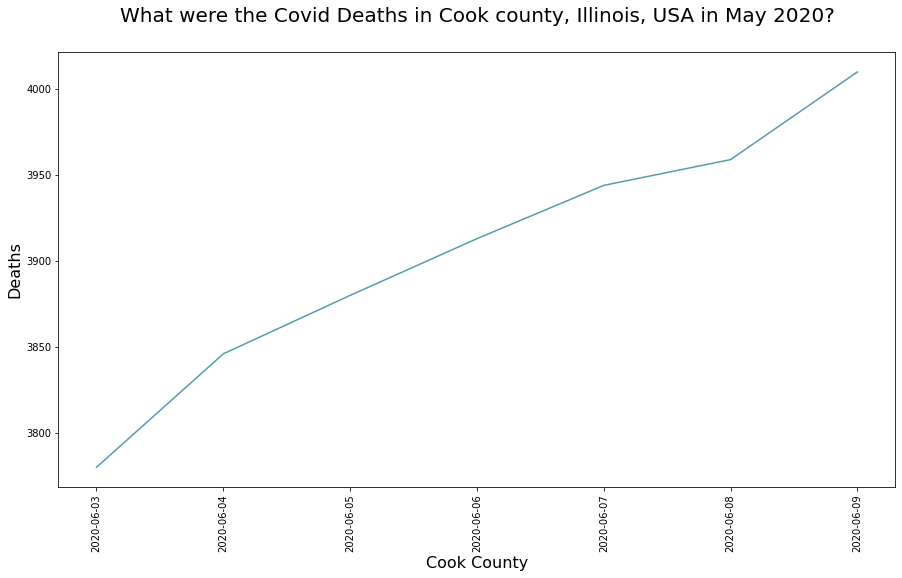

In [170]:
lineplot(df1.index, df1.FACT_SUM, x_label="Cook County", y_label="Deaths", title="What were the Covid Deaths in Cook county, Illinois, USA in June 2020?" )

#What were the Covid Deaths this month?

In [179]:
countries="All"
states="All"
counties="All"
start_date="2020-06-01"
end_date="2020-06-11"
fact="Deaths"
question="What were the Covid Deaths this month?"
new=query_it(countries,states,counties,start_date,end_date,fact)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (6,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [176]:
new["FACT_SUM"]=new["FACT_SUM"].map(lambda x:int(x))
my_ser=new.groupby("DIMENSION_TIME")["FACT_SUM"].sum()
df1=my_ser.to_frame()

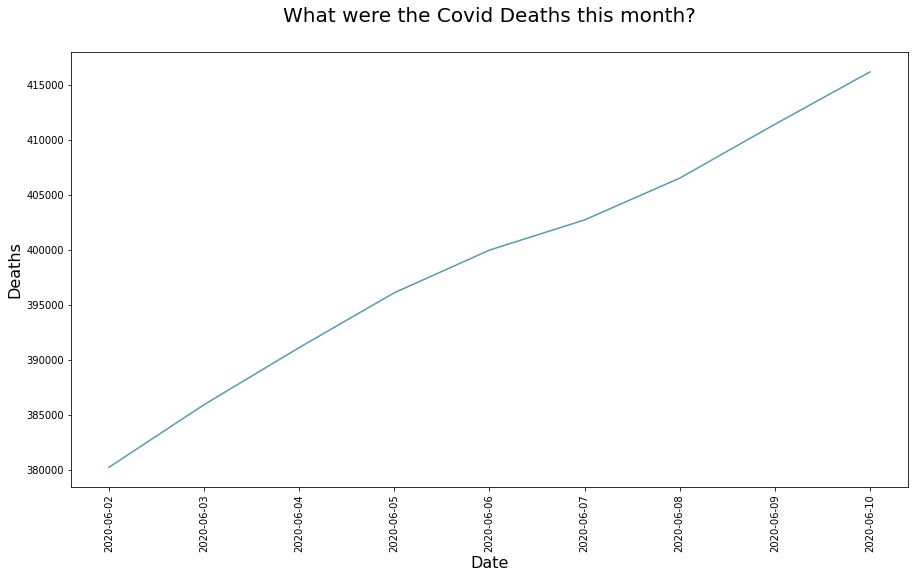

In [180]:
lineplot(df1.index, df1.FACT_SUM, x_label="Date", y_label=fact, title=question )

# What were the Covid Deaths in Afganistan 2020?

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (6,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


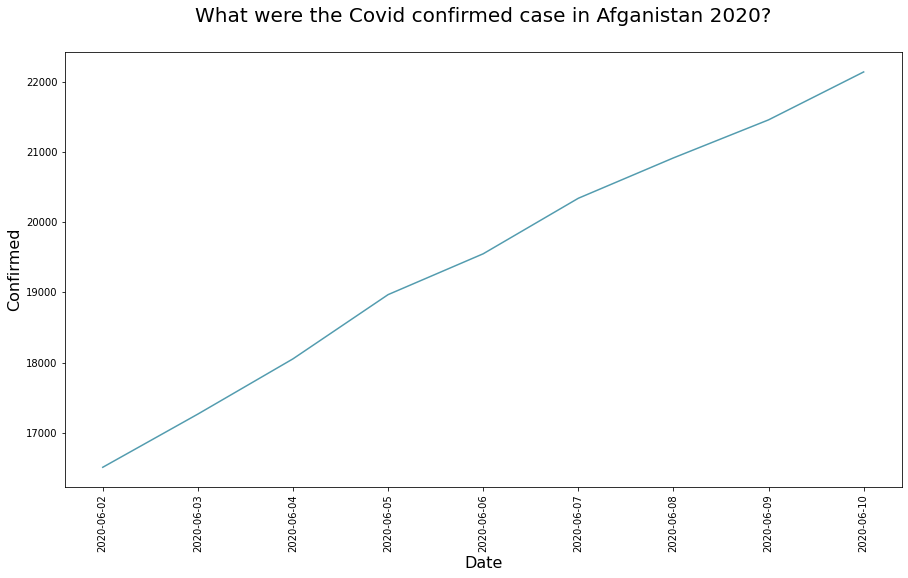

In [188]:
question="What were the Covid confirmed case in Afganistan 2020?"
countries="Afghanistan"
states="All"
counties="All"
start_date="2020-06-01"
end_date="2020-06-11"
fact="Confirmed"
new=query_it(countries,states,counties,start_date,end_date,fact)
new["FACT_SUM"]=new["FACT_SUM"].map(lambda x:int(x))
my_ser=new.groupby("DIMENSION_TIME")["FACT_SUM"].sum()
df1=my_ser.to_frame()
lineplot(df1.index, df1.FACT_SUM, x_label="Date", y_label=fact, title=question )

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (6,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


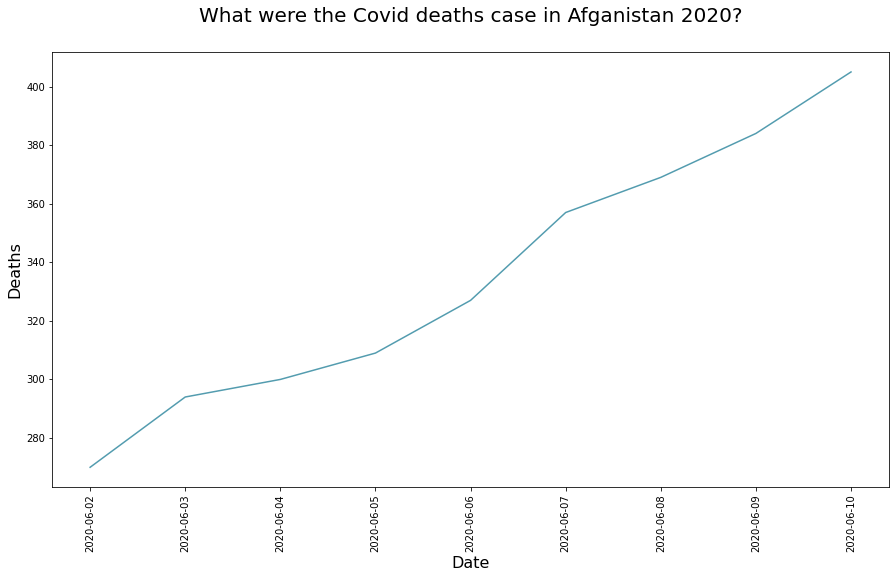

In [190]:
question="What were the Covid deaths case in Afganistan 2020?"
countries="Afghanistan"
states="All"
counties="All"
start_date="2020-06-01"
end_date="2020-06-11"
fact="Deaths"
new=query_it(countries,states,counties,start_date,end_date,fact)
new["FACT_SUM"]=new["FACT_SUM"].map(lambda x:int(x))
my_ser=new.groupby("DIMENSION_TIME")["FACT_SUM"].sum()
df1=my_ser.to_frame()
lineplot(df1.index, df1.FACT_SUM, x_label="Date", y_label=fact, title=question )